In [1]:
!pip install yfinance scikit-learn matplotlib pandas


In [2]:
import yfinance as yf

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib as plt

In [5]:
data=yf.download('AAPL',start='2020-01-01',end='2024-12-31')

/tmp/ipython-input-2425962807.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download('AAPL',start='2020-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [6]:
print(data.head)

<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.620834   72.681281   71.373211   71.627084  135480400
2020-01-03   71.914810   72.676439   71.689950   71.847110  146322800
2020-01-06   72.487854   72.526541   70.783256   71.034717  118387200
2020-01-07   72.146927   72.753808   71.926900   72.497514  108872000
2020-01-08   73.307518   73.609752   71.849540   71.849540  132079200
...                ...         ...         ...         ...        ...
2024-12-23  254.655716  255.034791  252.840088  254.156919   40858800
2024-12-24  257.578674  257.588630  254.675658  254.875189   23234700
2024-12-26  258.396667  259.474086  257.010028  257.568678   27237100
2024-12-27  254.974930  258.077462  252.451019  257.209530   42355300
2024-12-30  251.593079  252.889953  250.146571  251.623005  

In [8]:
# Shift the 'Close' column up by 1 to use today’s data to predict tomorrow’s closing price
data['Target'] = data['Close'].shift(-1)

# Drop last row (Target will be NaN)
data = data.dropna()

# Features: Open, High, Low, Volume
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']


In [9]:
data

Price,Close,High,Low,Open,Volume,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,71.914810
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,72.487854
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,72.146927
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000,73.307518
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,74.864632
...,...,...,...,...,...,...
2024-12-20,253.877594,254.386361,245.098768,247.443103,147495300,254.655716
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,257.578674


In [11]:
# Use 80% data for training, 20% for testing
split = int(len(data) * 0.8)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


In [12]:
split

1004

In [13]:
X_train

Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-01-02,71.627084,72.681281,71.373211,135480400
2020-01-03,71.847110,72.676439,71.689950,146322800
2020-01-06,71.034717,72.526541,70.783256,118387200
2020-01-07,72.497514,72.753808,71.926900,108872000
2020-01-08,71.849540,73.609752,71.849540,132079200
...,...,...,...,...
2023-12-20,195.468548,196.242876,193.413605,52242800
2023-12-21,194.674369,195.647240,192.093265,46482500


In [14]:
X_test

Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2023-12-28,192.728625,193.244849,191.765676,34049900
2023-12-29,192.490361,192.986726,190.336138,42672100
2024-01-02,185.789422,187.070052,182.553128,82488700
2024-01-03,182.880742,184.528677,182.096477,58414500
2024-01-04,180.825785,181.758954,179.565029,71983600
...,...,...,...,...
2024-12-20,247.443103,254.386361,245.098768,147495300
2024-12-23,254.156919,255.034791,252.840088,40858800


In [15]:
X_test

Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2023-12-28,192.728625,193.244849,191.765676,34049900
2023-12-29,192.490361,192.986726,190.336138,42672100
2024-01-02,185.789422,187.070052,182.553128,82488700
2024-01-03,182.880742,184.528677,182.096477,58414500
2024-01-04,180.825785,181.758954,179.565029,71983600
...,...,...,...,...
2024-12-20,247.443103,254.386361,245.098768,147495300
2024-12-23,254.156919,255.034791,252.840088,40858800


In [16]:
y_test

,Target
Date,
2023-12-28,191.130325
2023-12-29,184.290405
2024-01-02,182.910522
2024-01-03,180.587540
2024-01-04,179.862823
...,...
2024-12-20,254.655716
2024-12-23,257.578674
2024-12-24,258.396667


In [17]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [18]:
model

LinearRegression()

In [19]:
predictions=model.predict(X_test)

In [20]:
predictions

array([192.50122444, 191.05427805, 183.92048138, 183.75655136,
       180.67824091, 179.83013626, 183.28109304, 182.71360297,
       184.5386097 , 183.02536254, 184.72561075, 181.62228401,
       180.6451976 , 187.23226895, 189.85150414, 193.5749372 ,
       193.32227882, 194.01577888, 192.85794062, 191.25452723,
       188.68502592, 187.11079254, 183.40700435, 185.16175453,
       184.15569879, 185.70414438, 187.67285273, 187.90341608,
       186.44366455, 188.26583421, 186.20737968, 183.10677024,
       181.85934442, 181.3598546 , 182.04956405, 179.78254001,
       180.67309425, 182.88112572, 181.50480932, 180.32601676,
       181.04101373, 179.87878212, 179.89454015, 177.45952408,
       173.72429948, 170.02182164, 168.20266003, 169.119997  ,
       171.99734721, 172.53128773, 171.05261626, 170.44306986,
       172.51060601, 170.84188366, 174.53369558, 174.13963744,
       176.71603725, 170.53951964, 170.44171908, 169.89102837,
       170.06804919, 171.97099441, 170.25953635, 168.89

In [22]:
import matplotlib.pyplot as plt


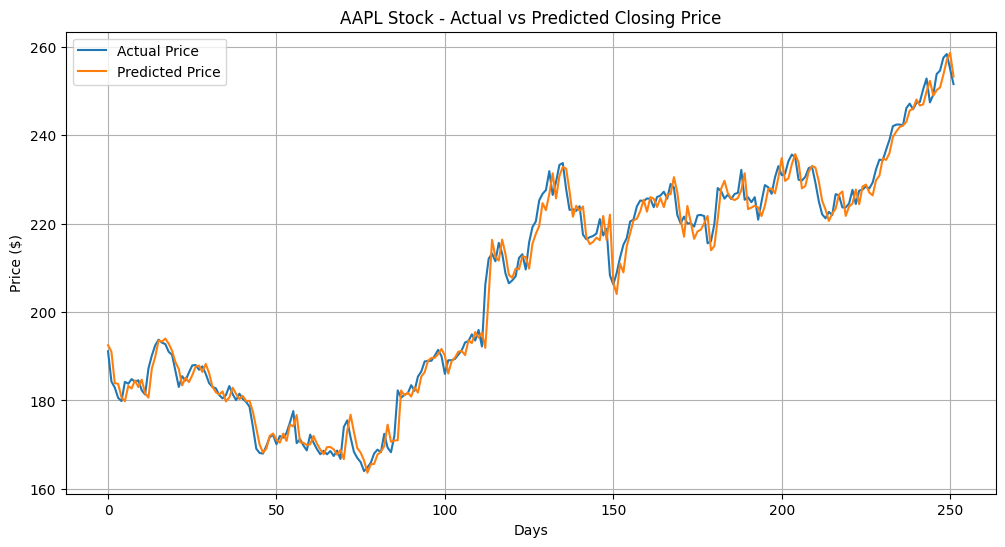

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('AAPL Stock - Actual vs Predicted Closing Price')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
latest = X.tail(1)  # Last available day
predicted_price = model.predict(latest)
print(f"Predicted next day's closing price: ${predicted_price[0]:.2f}")


Predicted next day's closing price: $253.31
